## **IMPORTING REQUIRED MODULES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## **READING THE DATA**

In [ ]:
path = "/content/drive/MyDrive/FCS_PROJECT/malacious_fcs.csv"
data = pd.read_csv(path,encoding='latin-1')
data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


## **DATA STATISTICS**

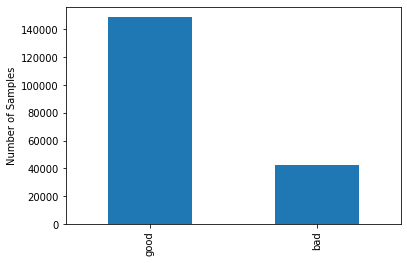

good    148932
bad      42767
Name: label, dtype: int64

In [ ]:
data['label'].value_counts().plot(kind='bar')
plt.ylabel("Number of Samples")
plt.show()
data['label'].value_counts()

## **MAPPING THE LABELS TO NUMERICS**

In [ ]:
di = {"bad": '1', "good": '0'}
data['label'].replace(di, inplace=True)
print(data['label'].value_counts())

0    148932
1     42767
Name: label, dtype: int64


## **PERFORMING TRAIN-CV-TEST SPLIT**

In [ ]:
x_train,x_cv,y_train,y_cv = train_test_split(data['url'],data['label'],train_size=0.90,stratify =data['label'],random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,train_size=0.90,stratify=y_train,random_state=42)
print("Shape of X Train ::",x_train.shape)
print("Shape of Y Train ::",y_train.shape)
print("Shape of X CV::",x_cv.shape)
print("Shape of Y CV::",y_cv.shape)
print("Shape of X Test ::",x_test.shape)
print("Shape of Y Test ::",y_test.shape)

Shape of X Train :: (155276,)
Shape of Y Train :: (155276,)
Shape of X CV:: (19170,)
Shape of Y CV:: (19170,)
Shape of X Test :: (17253,)
Shape of Y Test :: (17253,)


## **SAMPLES COUNT CLASS WISE IN TRAINING DATA**

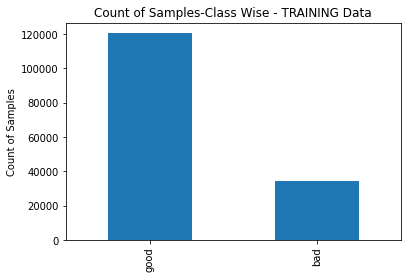

0    120635
1     34641
Name: label, dtype: int64

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['good','bad'])
plt.ylabel("Count of Samples")
plt.title("Count of Samples-Class Wise - TRAINING Data")
plt.show()
y_train.value_counts()

## **SAMPLES COUNT CLASS WISE IN CV DATA**

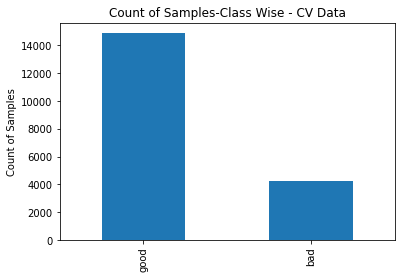

0    14893
1     4277
Name: label, dtype: int64

In [ ]:
y_cv.value_counts().plot(kind='bar')
plt.xticks([0,1],['good','bad'])
plt.ylabel("Count of Samples")
plt.title("Count of Samples-Class Wise - CV Data")
plt.show()
y_cv.value_counts()

## **SAMPLES COUNT CLASS WISE IN TEST DATA**

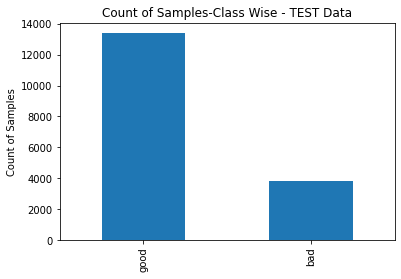

0    13404
1     3849
Name: label, dtype: int64

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xticks([0,1],['good','bad'])
plt.ylabel("Count of Samples")
plt.title("Count of Samples-Class Wise - TEST Data")
plt.show()
y_test.value_counts()

## **TOKENIZING THE DATA**

#### **THE TOKENIZER FUNCTION**

In [ ]:
def tokenizer(url):
  sb_hash = url.split("/")
  sb_dot=[]
  sb_hyphen=[]
  for i in sb_hash:
    temp = i.split(".")
    for j in temp:
      sb_dot.append(j)
  for i in sb_dot:
    temp = i.split("-")
    for j in temp:
      sb_hyphen.append(j)
  final_tokens = list(set(sb_hyphen))
  if "com" in final_tokens:
    final_tokens.remove("com")
  if "" in final_tokens:
    final_tokens.remove("")
  return ' '.join(final_tokens)

#### **TOKENIZER EXAMPLE**

In [ ]:
tokenizer("mani-kumar/reddy.co.com")

'reddy co kumar mani'

#### **TOKENIZING THE TRAINING DATA**

In [ ]:
x_train_tok = x_train.apply(tokenizer)
x_train_tok

176702    pic roy net pics htm allstarpics gallery brock...
7677                                          SRVjEY goo gl
98136       Diane_Cho females php gogomag talkingheads bios
137200    96 CJFM FM Virgin 959 radioradio7 Canada Radio...
186404    archive stream beatricedesteduc00cartuoft org ...
                                ...                        
6477                             GD lillyskitchentable qies
117844    edu mit detail mitsloan php?in_spseqno=41459&c...
73317                  en Battle_of_Sideling_Hill goldenmap
111153    obituary posttribune trib ryan legacy obituari...
132800                      pipl 200 directory name Hrivnak
Name: url, Length: 155276, dtype: object

#### **TOKENIZING THE CV DATA**

In [ ]:
x_cv_tok = x_cv.apply(tokenizer)
x_cv_tok

161129    bin cgi?op=REG&db=pierref&id=I5319 cgi wc igm ...
111090                       ?page=rplistings leaseyourhome
7673                lap GD index arcflashriskassessment php
6530                             dbkunsult eu globalmarkets
67048               dakotacooks champlin weinberg event max
                                ...                        
50219                       ate entrewave view htm pproject
36378       space document drive word in filewords asenergy
128241           ca openparliament jean politicians crowder
176809                   allthelyrics wendy_matthews lyrics
29448                       bell contact callmr html global
Name: url, Length: 19170, dtype: object

#### **TOKENIZING THE TEST DATA**

In [ ]:
x_test_tok = x_test.apply(tokenizer)
x_test_tok

55382     sports_college 06 html west smith orlandosenti...
80414                     en wiki John_Ewasew org wikipedia
118976                                  montrealadvertising
4096       myhouselistingz 461b6eb2cf6cb5d64a063feb2e0b99fd
151732                                      thirstywhaletoo
                                ...                        
186861    royalhouseofwind031195mbp archive stream royal...
161444           chrisandjulie web HOME me html juliecmusic
80346          en wiki Joe_Henderson_(runner) org wikipedia
61721                                  blogspot cheektochic
171203       Bruce_Hart_(wrestler) absoluteastronomy topics
Name: url, Length: 17253, dtype: object

## **USING BAG-OF-WORDS (BOW) EMBEDDING**

In [ ]:
bow = CountVectorizer(stop_words='english',ngram_range=(1,1),max_features=10000)
x_train_bow = bow.fit_transform(x_train_tok)
x_cv_bow = bow.transform(x_cv_tok)
x_test_bow = bow.transform(x_test_tok)
print("Shape of Training Data after BOW embedding::",x_train_bow.shape)
print("Shape of CV Data after BOW embedding::",x_cv_bow.shape)
print("Shape of Test Data after BOW embedding::",x_test_bow.shape)

Shape of Training Data after BOW embedding:: (155276, 10000)
Shape of CV Data after BOW embedding:: (19170, 10000)
Shape of Test Data after BOW embedding:: (17253, 10000)


## **USING TF-IDF EMBEDDING**

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,1),max_features=10000)
x_train_tfidf = tfidf.fit_transform(x_train_tok)
x_cv_tfidf = tfidf.transform(x_cv_tok)
x_test_tfidf = tfidf.transform(x_test_tok)
print("Shape of Training Data after TFIDF embedding::",x_train_tfidf.shape)
print("Shape of CV Data after TFIDF embedding::",x_cv_tfidf.shape)
print("Shape of Test Data after TFIDF embedding::",x_test_tfidf.shape)

Shape of Training Data after TFIDF embedding:: (155276, 10000)
Shape of CV Data after TFIDF embedding:: (19170, 10000)
Shape of Test Data after TFIDF embedding:: (17253, 10000)


## **STANDARDISING THE DATA**

In [ ]:
scale_bow = StandardScaler(with_mean=False)
x_train_bow_std = scale_bow.fit_transform(x_train_bow)
x_cv_bow_std = scale_bow.transform(x_cv_bow)
x_test_bow_std = scale_bow.transform(x_test_bow)

scale_tfidf = StandardScaler(with_mean=False)
x_train_tfidf_std = scale_tfidf.fit_transform(x_train_tfidf)
x_cv_tfidf_std = scale_tfidf.transform(x_cv_tfidf)
x_test_tfidf_std = scale_tfidf.transform(x_test_tfidf)

In [ ]:
filename4 = '/content/drive/MyDrive/FCS_PROJECT/x_train_tok.pickle'
pickle.dump(x_train_tok, open(filename4, 'wb'))

In [ ]:
import pickle
filename3 = '/content/drive/MyDrive/FCS_PROJECT/x_train_vect.pickle'
pickle.dump(x_train_tfidf, open(filename3, 'wb'))

# **APPLYING DECISION TREE**

In [ ]:
def dtree(train,trainlab,cv,cvlab):
  from tqdm import tqdm
  depth=[150,200,250,300,350,400]
  prec=[]
  recall=[]
  f1score=[]
  for d in tqdm(depth,leave=True,position=0):
    dt = DecisionTreeClassifier(max_depth=d,random_state=0)
    dt.fit(train,trainlab)
    preds = dt.predict(cv)
    prec.append(precision_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    recall.append(recall_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    f1score.append(f1_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
  return depth,prec,recall,f1score

#### **BOW EMBEDDING**

In [ ]:
depth,prec_dt_bow,recall_dt_bow,f1score_dt_bow = dtree(x_train_bow,y_train,x_cv_bow,y_cv)

100%|██████████| 6/6 [00:34<00:00,  5.67s/it]


#### **TFIDF EMBEDDING**

In [ ]:
depth,prec_dt_tfidf,recall_dt_tfidf,f1score_dt_tfidf = dtree(x_train_tfidf,y_train,x_cv_tfidf,y_cv)

100%|██████████| 6/6 [01:17<00:00, 12.84s/it]


## **RESULTS ON CV DATA (DT)**

#### **Optimal Value at depth=400;F1 score = 0.9009; BOW Embedding**

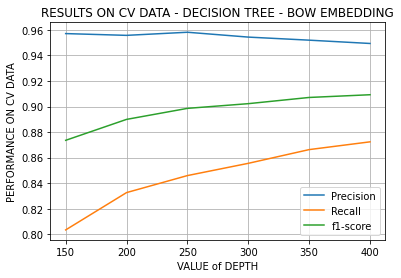

[0.9571030640668524, 0.9557165861513688, 0.958156779661017, 0.9543557642149192, 0.9519527235354573, 0.9493638676844783]
[0.8033668459200374, 0.8325929389759177, 0.8459200374093991, 0.8555061959317278, 0.8662613981762918, 0.8723404255319149]
[0.8735223083767636, 0.8899162813944771, 0.8985471252949212, 0.9022315374183209, 0.9070877708409842, 0.9092238333130254]
[150, 200, 250, 300, 350, 400]


In [ ]:
plt.plot(prec_dt_bow,label="Precision")
plt.plot(recall_dt_bow,label="Recall")
plt.plot(f1score_dt_bow,label="f1-score")
plt.xticks([x for x in range(6)],['150','200','250','300','350','400'])
plt.xlabel("VALUE of DEPTH")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - DECISION TREE - BOW EMBEDDING")
plt.legend()
plt.show()
print(prec_dt_bow)
print(recall_dt_bow)
print(f1score_dt_bow)
print(depth)

#### **Optimal Value at depth=400 ;F1 score =0.9123 ; TFIDF Embedding**

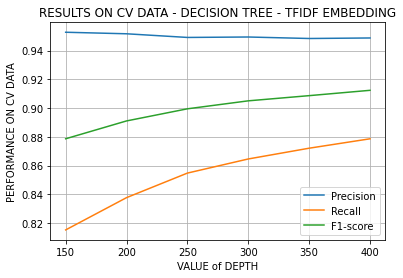

[0.9527322404371584, 0.9516600265604249, 0.9491173416407062, 0.9494223363286265, 0.9483854563946097, 0.9487503155768745]
[0.8152910918868366, 0.8377367313537526, 0.8548047696983867, 0.8646247369651625, 0.8721066167874678, 0.878653261631985]
[0.8786695224896057, 0.8910718726684903, 0.8994956329191782, 0.9050416054821342, 0.9086479902557856, 0.912357368293275]
[150, 200, 250, 300, 350, 400]


In [ ]:
plt.plot(prec_dt_tfidf,label="Precision")
plt.plot(recall_dt_tfidf,label="Recall")
plt.plot(f1score_dt_tfidf,label="F1-score")
plt.xticks([x for x in range(6)],['150','200','250','300','350','400'])
plt.xlabel("VALUE of DEPTH")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - DECISION TREE - TFIDF EMBEDDING")
plt.legend()
plt.show()
print(prec_dt_tfidf)
print(recall_dt_tfidf)
print(f1score_dt_tfidf)
print(depth)

# **APPLYING RANDOM FOREST**

In [ ]:
def rand_fors(train,trainlab,cv,cvlab):
  depth=[250,300,350,400,450,500,600,700]
  prec=[]
  recall=[]
  f1score=[]
  for d in tqdm(depth,leave=True,position=0):
    rf = RandomForestClassifier(n_estimators = 100,max_depth=d,random_state=0)
    rf.fit(train,trainlab)
    preds = rf.predict(cv)
    prec.append(precision_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    recall.append(recall_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    f1score.append(f1_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
  return depth,prec,recall,f1score

#### **BOW EMBEDDING**

In [ ]:
depth,prec_rf_bow,recall_rf_bow,f1score_rf_bow = rand_fors(x_train_bow,y_train,x_cv_bow,y_cv)

100%|██████████| 8/8 [11:09<00:00, 83.66s/it]


#### **TFIDF EMBEDDING**

In [ ]:
depth,prec_rf_tfidf,recall_rf_tfidf,f1score_rf_tfidf = rand_fors(x_train_tfidf,y_train,x_cv_tfidf,y_cv)

100%|██████████| 8/8 [11:31<00:00, 86.49s/it]


## **RESULTS ON CV DATA (RANDOM FOREST)**

#### **Optimal value at depth=700 ; F1score =0.9263  ; BOW Embedding**

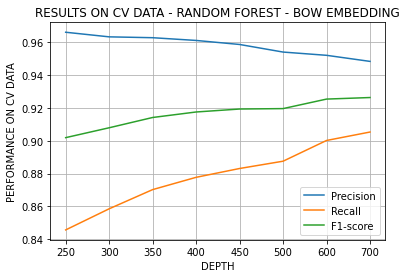

[0.9660790598290598, 0.9632738719832109, 0.9627521986549405, 0.9610855094726063, 0.9586294416243655, 0.9540085448605177, 0.9520276953511375, 0.9483223120254715]
[0.845686228664952, 0.8585457096095394, 0.8702361468318915, 0.8777180266541968, 0.8830956277764789, 0.8875379939209727, 0.900163666121113, 0.9053074584989479]
[0.9018825582845031, 0.907899616763506, 0.9141594007122682, 0.917511914945619, 0.9193136181087987, 0.9195736434108527, 0.9253695469294557, 0.9263157894736843]
[250, 300, 350, 400, 450, 500, 600, 700]


In [ ]:
plt.plot(prec_rf_bow,label="Precision")
plt.plot(recall_rf_bow,label="Recall")
plt.plot(f1score_rf_bow,label="F1-score")
plt.xticks([x for x in range(8)],['250','300','350','400','450','500','600','700'])
plt.xlabel("DEPTH")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - RANDOM FOREST - BOW EMBEDDING")
plt.legend()
plt.show()
print(prec_rf_bow)
print(recall_rf_bow)
print(f1score_rf_bow)
print(depth)

#### **Optimal value at depth=700 ; F1score = 0.931 ; TFIDF Embedding**

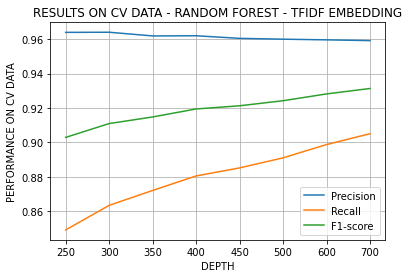

[0.9639065817409767, 0.9639780736100235, 0.961835997937081, 0.961941251596424, 0.9604261796042618, 0.9599496221662468, 0.9595606590114828, 0.9591179385530227]
[0.8491933598316577, 0.8634556932429273, 0.8721066167874678, 0.8805237315875614, 0.8851999064765023, 0.8910451250876783, 0.8987608136544307, 0.9050736497545008]
[0.9029210689869483, 0.9109521460286136, 0.9147762109135499, 0.9194335937499999, 0.9212799610658231, 0.9242148660118831, 0.928166123385247, 0.9313124022615181]
[250, 300, 350, 400, 450, 500, 600, 700]


In [ ]:
plt.plot(prec_rf_tfidf,label="Precision")
plt.plot(recall_rf_tfidf,label="Recall")
plt.plot(f1score_rf_tfidf,label="F1-score")
plt.xticks([x for x in range(8)],['250','300','350','400','450','500','600','700'])
plt.xlabel("DEPTH")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - RANDOM FOREST - TFIDF EMBEDDING")
plt.legend()
plt.show()
print(prec_rf_tfidf)
print(recall_rf_tfidf)
print(f1score_rf_tfidf)
print(depth)

# **APPLYING LOGISTIC REGRESSION**

In [ ]:
def log_reg(train,trainlab,cv,cvlab):
  c=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
  prec=[]
  recall=[]
  f1score=[]
  for c_val in c:
    lr = LogisticRegression(C=c_val,random_state=0)
    lr.fit(train,trainlab)
    preds = lr.predict(cv)
    prec.append(precision_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    recall.append(recall_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
    f1score.append(f1_score([int(x) for x in cvlab.values],[int(x) for x in preds]))
  return c,prec,recall,f1score

#### **BOW EMBEDDING**

In [ ]:
c,prec_lr_bow,recall_lr_bow,f1score_lr_bow = log_reg(x_train_bow_std,y_train,x_cv_bow_std,y_cv)

#### **TF-IDF EMBEDDING**

In [ ]:
c,prec_lr_tfidf,recall_lr_tfidf,f1score_lr_tfidf = log_reg(x_train_tfidf_std,y_train,x_cv_tfidf_std,y_cv)

## **RESULTS ON CV DATA (LOGISTIC REGRESSION)**

#### **Optimal value at c=0.01 ; F1score = 0.9340 ; BOW Embedding**



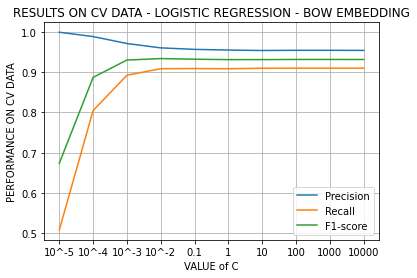

[0.999540018399264, 0.9887963228957196, 0.971501272264631, 0.9607019278299556, 0.9569389763779528, 0.9552715654952076, 0.9541554302525129, 0.9546346248160863, 0.9546346248160863, 0.9544005883795048]
[0.508066401683423, 0.8047696983867196, 0.8926817862988076, 0.9088145896656535, 0.9092822071545476, 0.9088145896656535, 0.9099836333878887, 0.9102174421323358, 0.9102174421323358, 0.9102174421323358]
[0.6736940009300885, 0.8873420984789895, 0.9304252467405872, 0.9340382073771478, 0.9325020980697758, 0.9314641744548287, 0.9315461943513643, 0.9318970676241771, 0.9318970676241771, 0.9317855433221637]
[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


In [ ]:
plt.plot(prec_lr_bow,label="Precision")
plt.plot(recall_lr_bow,label="Recall")
plt.plot(f1score_lr_bow,label="F1-score")
plt.xticks([x for x in range(10)],['10^-5','10^-4','10^-3','10^-2','0.1','1','10','100','1000','10000'])
plt.xlabel("VALUE of C")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - LOGISTIC REGRESSION - BOW EMBEDDING")
plt.legend()
plt.show()
print(prec_lr_bow)
print(recall_lr_bow)
print(f1score_lr_bow)
print(c)

#### **Optimal value at c=0.001 ; F1score = 0.9346 ; TFIDF Embedding**

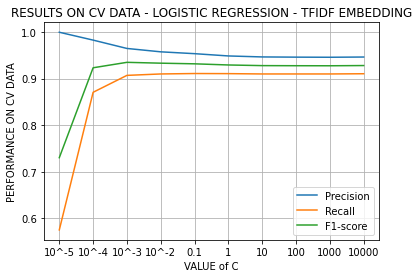

[0.999187982135607, 0.9823218997361478, 0.9644367072867446, 0.9571955719557196, 0.9532550171316692, 0.948368241597662, 0.9462548638132295, 0.9457948468643655, 0.9455650060753341, 0.9460510328068044]
[0.5754033200841712, 0.8704699555763385, 0.9067103109656302, 0.9097498246434417, 0.9106850596212298, 0.9104512508767828, 0.9097498246434417, 0.9097498246434417, 0.9097498246434417, 0.9102174421323358]
[0.7302670623145401, 0.9230197099293418, 0.9346830561581103, 0.9328698153919923, 0.9314839172545737, 0.9290230227842061, 0.9276433424722852, 0.9274222381122632, 0.9273117254528122, 0.9277883698760725]
[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


In [ ]:
plt.plot(prec_lr_tfidf,label="Precision")
plt.plot(recall_lr_tfidf,label="Recall")
plt.plot(f1score_lr_tfidf,label="F1-score")
plt.xticks([x for x in range(10)],['10^-5','10^-4','10^-3','10^-2','0.1','1','10','100','1000','10000'])
plt.xlabel("VALUE of C")
plt.ylabel("PERFORMANCE ON CV DATA")
plt.grid(linestyle='-')
plt.title("RESULTS ON CV DATA - LOGISTIC REGRESSION - TFIDF EMBEDDING")
plt.legend()
plt.show()
print(prec_lr_tfidf)
print(recall_lr_tfidf)
print(f1score_lr_tfidf)
print(c)

## **SAVING THE OPTIMAL MODEL**

In [ ]:
lr_opt = LogisticRegression(C=0.001,random_state=0)
lr_opt.fit(x_train_tfidf_std,y_train)
preds_cv = lr_opt.predict(x_cv_tfidf_std)
preds_test = lr_opt.predict(x_test_tfidf_std)
print("Precison On CV Data::",precision_score([int(x) for x in y_cv.values],[int(x) for x in preds_cv]))
print("Recall On CV Data::",recall_score([int(x) for x in y_cv.values],[int(x) for x in preds_cv]))
print("F1-Score On CV Data::",f1_score([int(x) for x in y_cv.values],[int(x) for x in preds_cv]))
print("Precison On TEST Data::",precision_score([int(x) for x in y_test.values],[int(x) for x in preds_test]))
print("Recall On TEST Data::",recall_score([int(x) for x in y_test.values],[int(x) for x in preds_test]))
print("F1-Score On TEST Data::",f1_score([int(x) for x in y_test.values],[int(x) for x in preds_test]))

Precison On CV Data:: 0.9644367072867446
Recall On CV Data:: 0.9067103109656302
F1-Score On CV Data:: 0.9346830561581103
Precison On TEST Data:: 0.9658263305322129
Recall On TEST Data:: 0.8958170953494414
F1-Score On TEST Data:: 0.9295053241676775


In [ ]:
import pickle
filename = '/content/drive/MyDrive/FCS_PROJECT/optimal_lr.h5'
pickle.dump(lr_opt, open(filename, 'wb'))